In [35]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l1_l2
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


Load the MNIST dataset

In [24]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

Visualize the dataset

Target labels:  [2 0 4 7 2 0 7 7 0 8]


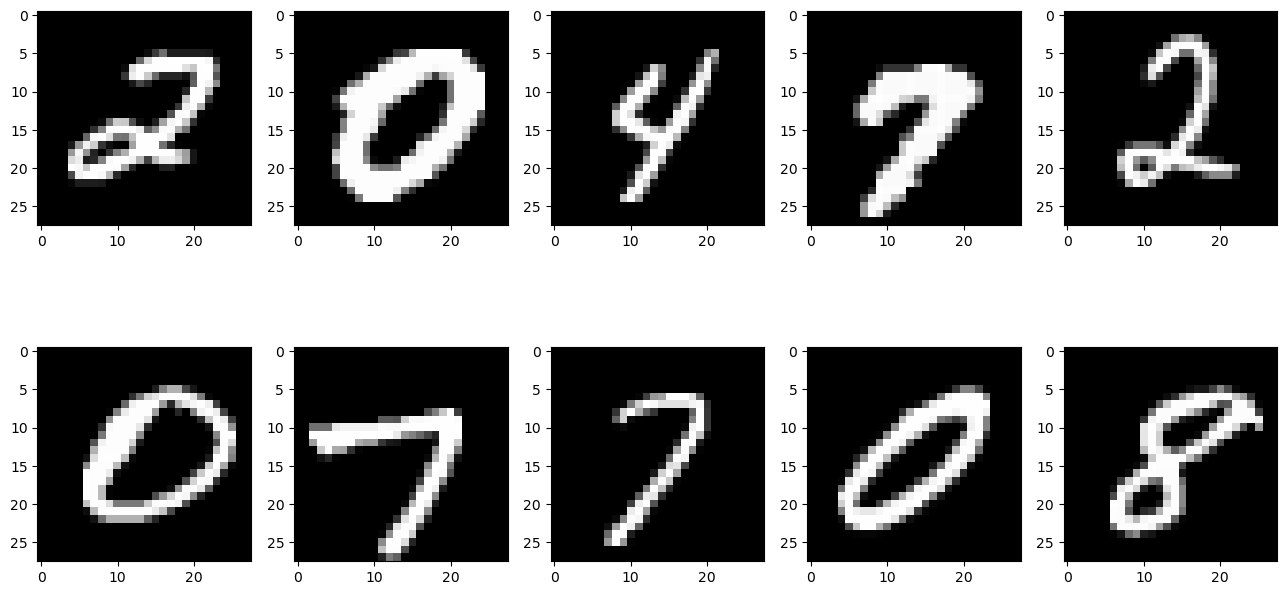

In [25]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [26]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [27]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001)))
model.add(Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001)))
model.add(Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001)))
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 10)                330       
                                                                 
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


Train the model

In [29]:
train_info = model.fit(new_train_data , new_train_target , epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2946 - accuracy: 0.8813
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7151 - accuracy: 0.9206
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6099 - accuracy: 0.9263
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5547 - accuracy: 0.9314
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5214 - accuracy: 0.9324
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4989 - accuracy: 0.9346
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4831 - accuracy: 0.9358
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4716 - accuracy: 0.9358
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4605 - accuracy: 0.9366
Epoch 10/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.450

Plot the loss and accuracy graphs

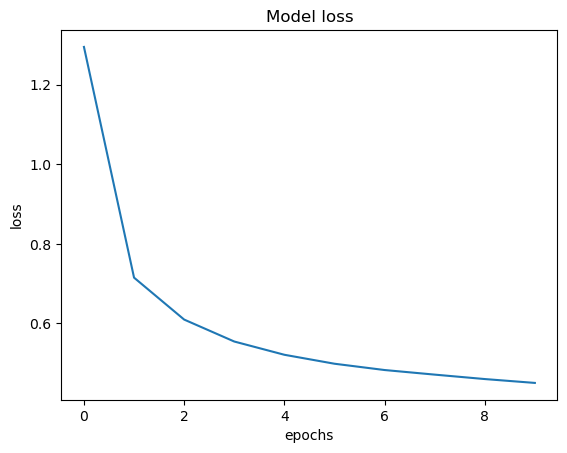

In [30]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

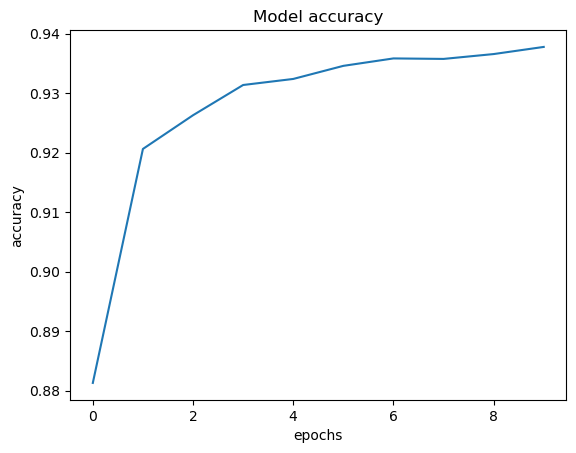

In [31]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [32]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 [==============================] - 1s 2ms/step - loss: 0.4365 - accuracy: 0.9402
Loss of the Test dataset is: 0.43646422028541565
Accuracy of the test dataset is: 0.9401999711990356


In [37]:
predicted_labels = model.predict(new_test_data)
predicted_classes = np.argmax(predicted_labels, axis=1)
true_classes = np.argmax(new_test_target, axis=1)

313/313 [==============================] - 0s 852us/step


Save the model weights

In [33]:
model.save_weights('MNIST_WEIGHTS_V1.h5')

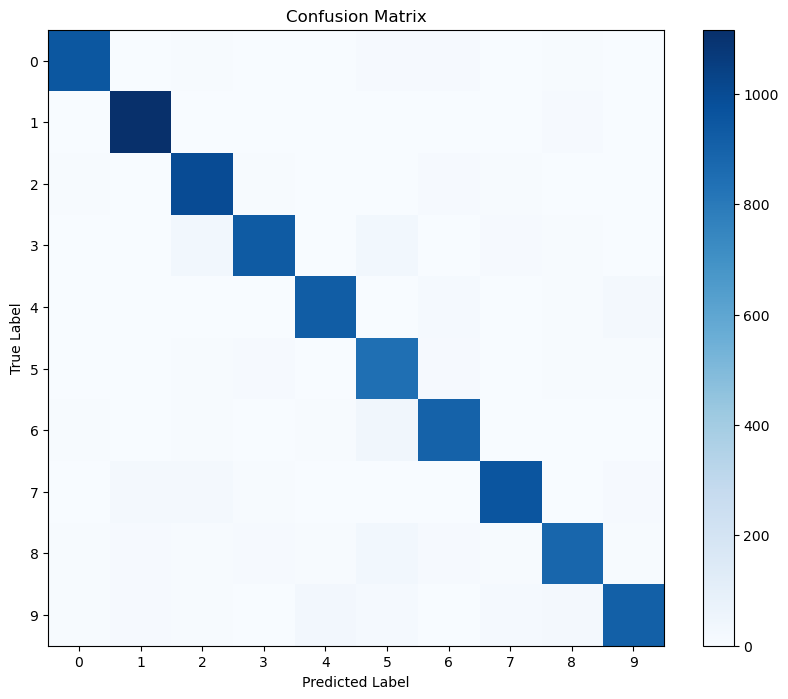

In [38]:
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Visualize the confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, range(10))
plt.yticks(tick_marks, range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()